In [210]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\tatia\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [211]:
import numpy as np
import cv2
from skimage.feature import peak_local_max
from skimage.segmentation import watershed
from scipy import ndimage
import matplotlib.pyplot as plt


coffee.png

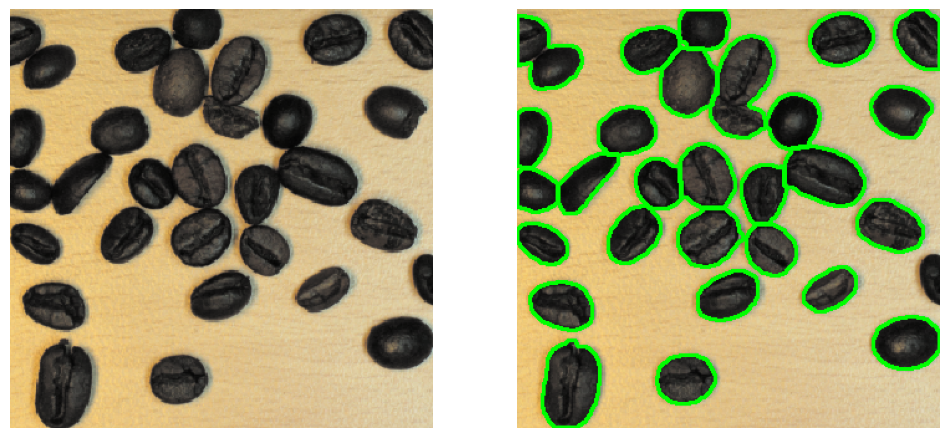

In [212]:
image = cv2.imread('img/coffee.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

distance_map = ndimage.distance_transform_edt(opening)
coordinates = peak_local_max(distance_map, min_distance=20, labels=opening)
mask = np.zeros(distance_map.shape, dtype=bool)
mask[tuple(coordinates.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance_map, markers, mask=opening)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

output = image.copy()
for label in np.unique(labels):
    if label == 0: 
        continue
    mask = np.zeros(gray.shape, dtype="uint8")
    mask[labels == label] = 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

blobs.png

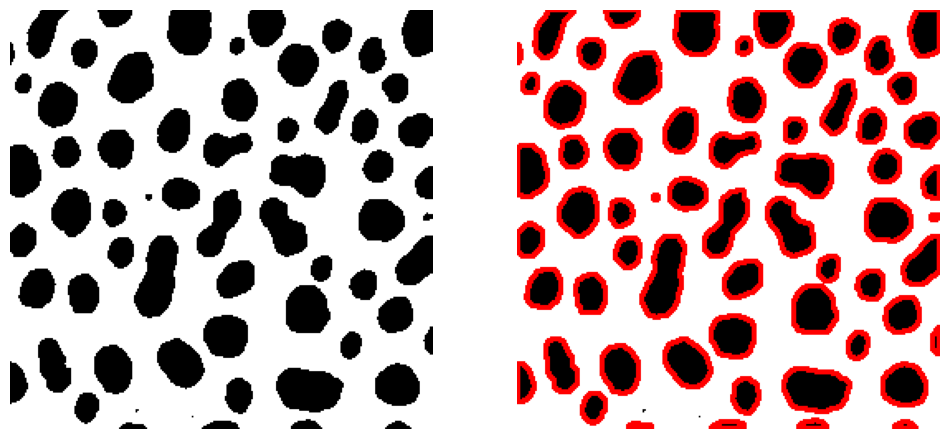

In [213]:
image = cv2.imread('img/blobs.png', cv2.IMREAD_GRAYSCALE)
original_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

blurred = cv2.GaussianBlur(image, (5, 5), 0)
_, binary = cv2.threshold(blurred, 127, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)

contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

result = original_color.copy()
cv2.drawContours(result, contours, -1, (0, 0, 255), 2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

rice.tif

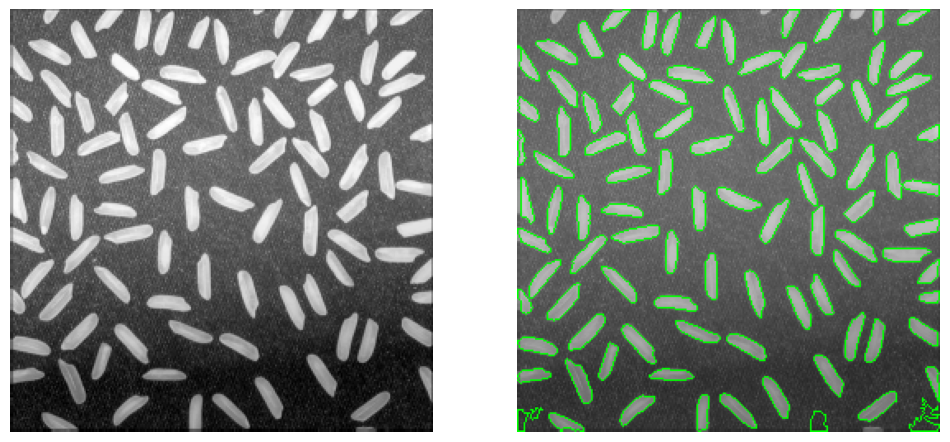

In [214]:
image = cv2.imread('img/rice.tif', cv2.IMREAD_GRAYSCALE)
original_color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

filtered = cv2.bilateralFilter(image, d=27, sigmaColor=62, sigmaSpace=62)
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(16, 16))
image_clahe = clahe.apply(filtered)
blur1 = cv2.GaussianBlur(image_clahe, (5, 5), 0.5)
blur2 = cv2.GaussianBlur(image_clahe, (15, 15), 7.5)
dog = blur1 - blur2
_, binary = cv2.threshold(dog, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

min_grain_area = 50
contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = original_color.copy()
n_grains = 0

for cnt in contours:
    if cv2.contourArea(cnt) > min_grain_area:
        cv2.drawContours(output, [cnt], -1, (0, 255, 0), 1)
        n_grains += 1

# Exibição
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


dowels.tif

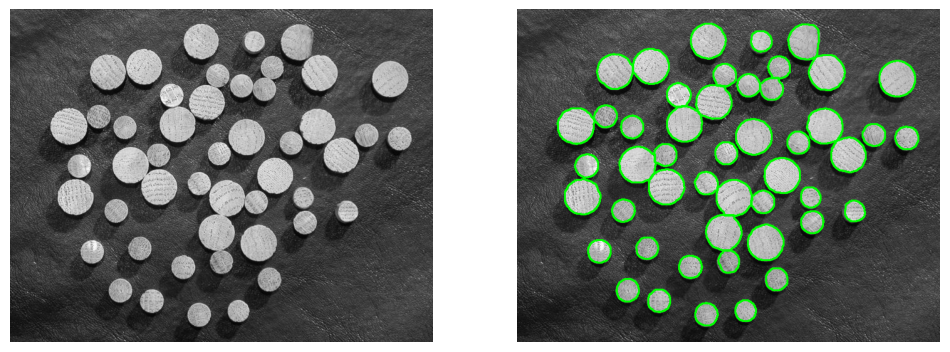

In [215]:
image = cv2.imread('img/dowels.tif')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (9, 9), 2)

_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

num_labels, labels_cc = cv2.connectedComponents(thresh)
opening = np.zeros_like(thresh)
for label in range(1, num_labels):
    if np.sum(labels_cc == label) > 200:
        opening[labels_cc == label] = 255

distance_map = ndimage.distance_transform_edt(opening)
coordinates = peak_local_max(distance_map, min_distance=30, labels=opening)
mask = np.zeros(distance_map.shape, dtype=bool)
mask[tuple(coordinates.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance_map, markers, mask=opening)

output = image.copy()
for label in np.unique(labels):
    if label == 0:
        continue
    mask = (labels == label).astype("uint8") * 255
    cnts, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(output, cnts, -1, (0, 255, 0), 2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

beans.png

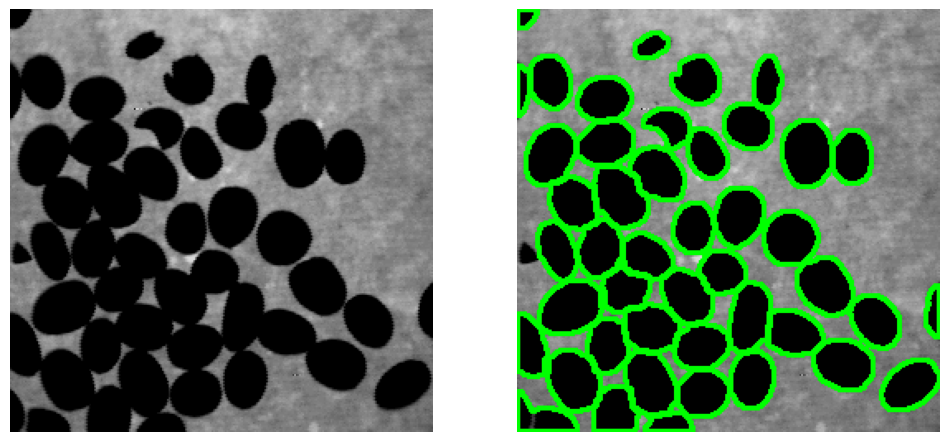

In [216]:

image = cv2.imread('img/beans.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
_, thresh = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

distance_map = ndimage.distance_transform_edt(opening)
distance_map = cv2.GaussianBlur(distance_map.astype(np.float32), (5, 5), 0.5)
coords = peak_local_max(distance_map, min_distance=7, footprint=np.ones((3, 3)), labels=opening)
mask = np.zeros(distance_map.shape, dtype=bool)
mask[tuple(coords.T)] = True
markers, _ = ndimage.label(mask)
labels = watershed(-distance_map, markers, mask=opening)

output = image.copy()
for label in np.unique(labels):
    if label == 0:
        continue
    mask = (labels == label).astype("uint8") * 255
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours and cv2.contourArea(contours[0]) >= 100:
        cv2.drawContours(output, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

chips.png

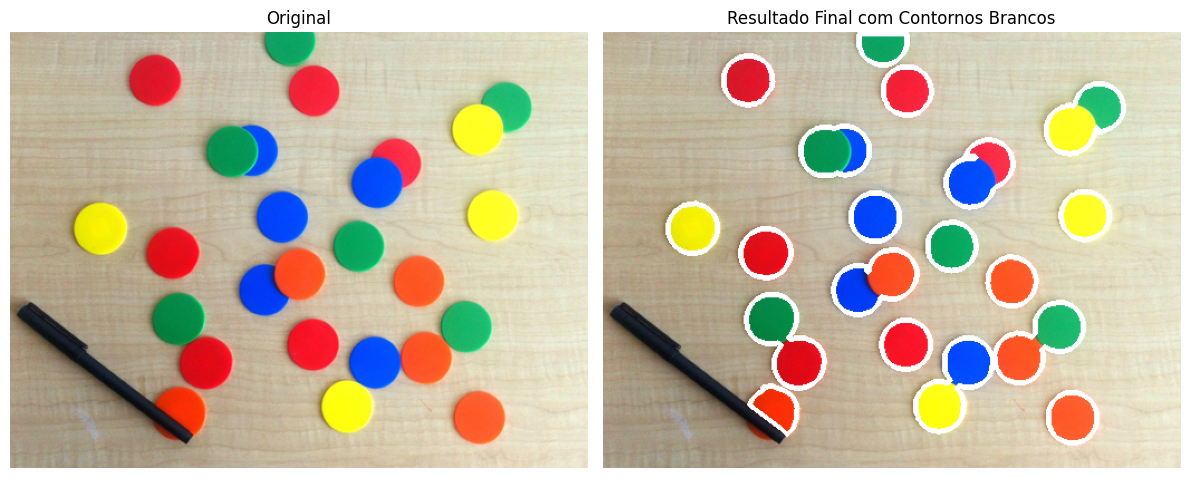

In [217]:
from scipy.signal import find_peaks

def process_image(image_path):
    image = cv2.imread(image_path)
    original = image.copy()
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_filtered = cv2.bilateralFilter(gray, 20, 100, 100)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    gray_clahe = clahe.apply(gray_filtered)
    
    h_channel = hsv[:, :, 0]
    hist = cv2.calcHist([h_channel], [0], None, [180], [0, 180]).ravel()
    peaks, _ = find_peaks(hist, height=np.max(hist)*0, distance=10)
    
    color_masks = []
    kernel = np.ones((7, 7), np.uint8)
    
    for peak in peaks:
        lower = np.array([max(0, peak-2), 60, 60])
        upper = np.array([min(179, peak+8), 255, 255])
        mask = cv2.inRange(hsv, lower, upper)
        mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)
        mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel, iterations=2)
        color_masks.append(mask)
    
    combined_mask = np.zeros_like(gray)
    for mask in color_masks:
        combined_mask = cv2.bitwise_or(combined_mask, mask)
    
    sure_bg = cv2.dilate(combined_mask, kernel, iterations=3)
    dist_transform = cv2.distanceTransform(combined_mask, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.3*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    
    unknown = cv2.subtract(sure_bg, sure_fg)
    _, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    
    markers = cv2.watershed(image, markers)
    
    final_mask = np.zeros_like(gray, dtype=np.uint8)
    final_mask[markers > 1] = 255
    
    contours, _ = cv2.findContours(final_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    result = original.copy()
    cv2.drawContours(result, contours, -1, (255, 255, 255), 3) 
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title('Resultado Final com Contornos Brancos')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

process_image('img/chips.png')


flowers.jpg

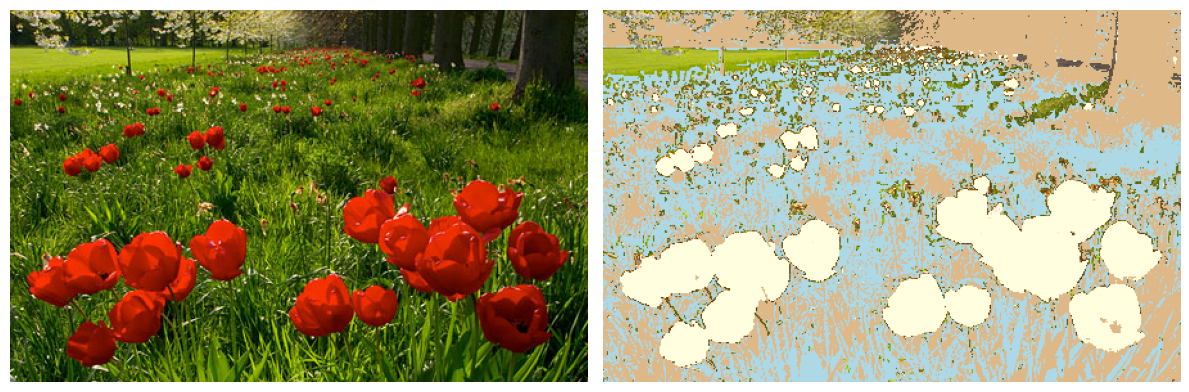

In [218]:
import matplotlib.colors as mcolors

image = cv2.imread('img/flowers.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_red1, upper_red1 = np.array([0, 70, 50]), np.array([10, 255, 255])
lower_red2, upper_red2 = np.array([170, 70, 50]), np.array([180, 255, 255])
mask_red = cv2.inRange(hsv, lower_red1, upper_red1) | cv2.inRange(hsv, lower_red2, upper_red2)

lower_green, upper_green = np.array([35, 40, 40]), np.array([85, 255, 255])
mask_green = cv2.inRange(hsv, lower_green, upper_green)

lower_dark, upper_dark = np.array([0, 0, 0]), np.array([180, 255, 80])
mask_dark = cv2.inRange(hsv, lower_dark, upper_dark) & ~mask_red

result = image_rgb.copy()
result[mask_red>0], result[mask_green>0], result[mask_dark>0] = (np.array(mcolors.to_rgb(c))*255 for c in ['lightyellow','lightblue','burlywood'])

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.axis('off')
plt.tight_layout()
plt.show()